In [47]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics


## Read your Titanic dataset as usual: Training set and Testing set Apply decision tree. 

In [48]:
#Importing our dataset from csv file
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [49]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
arbre = tree.DecisionTreeClassifier()  
arbre.fit(x_train, y_train)   #fitting our model
y_pred=arbre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


## Plot your decision tree and try to read the tree branches and conclude a prediction manually

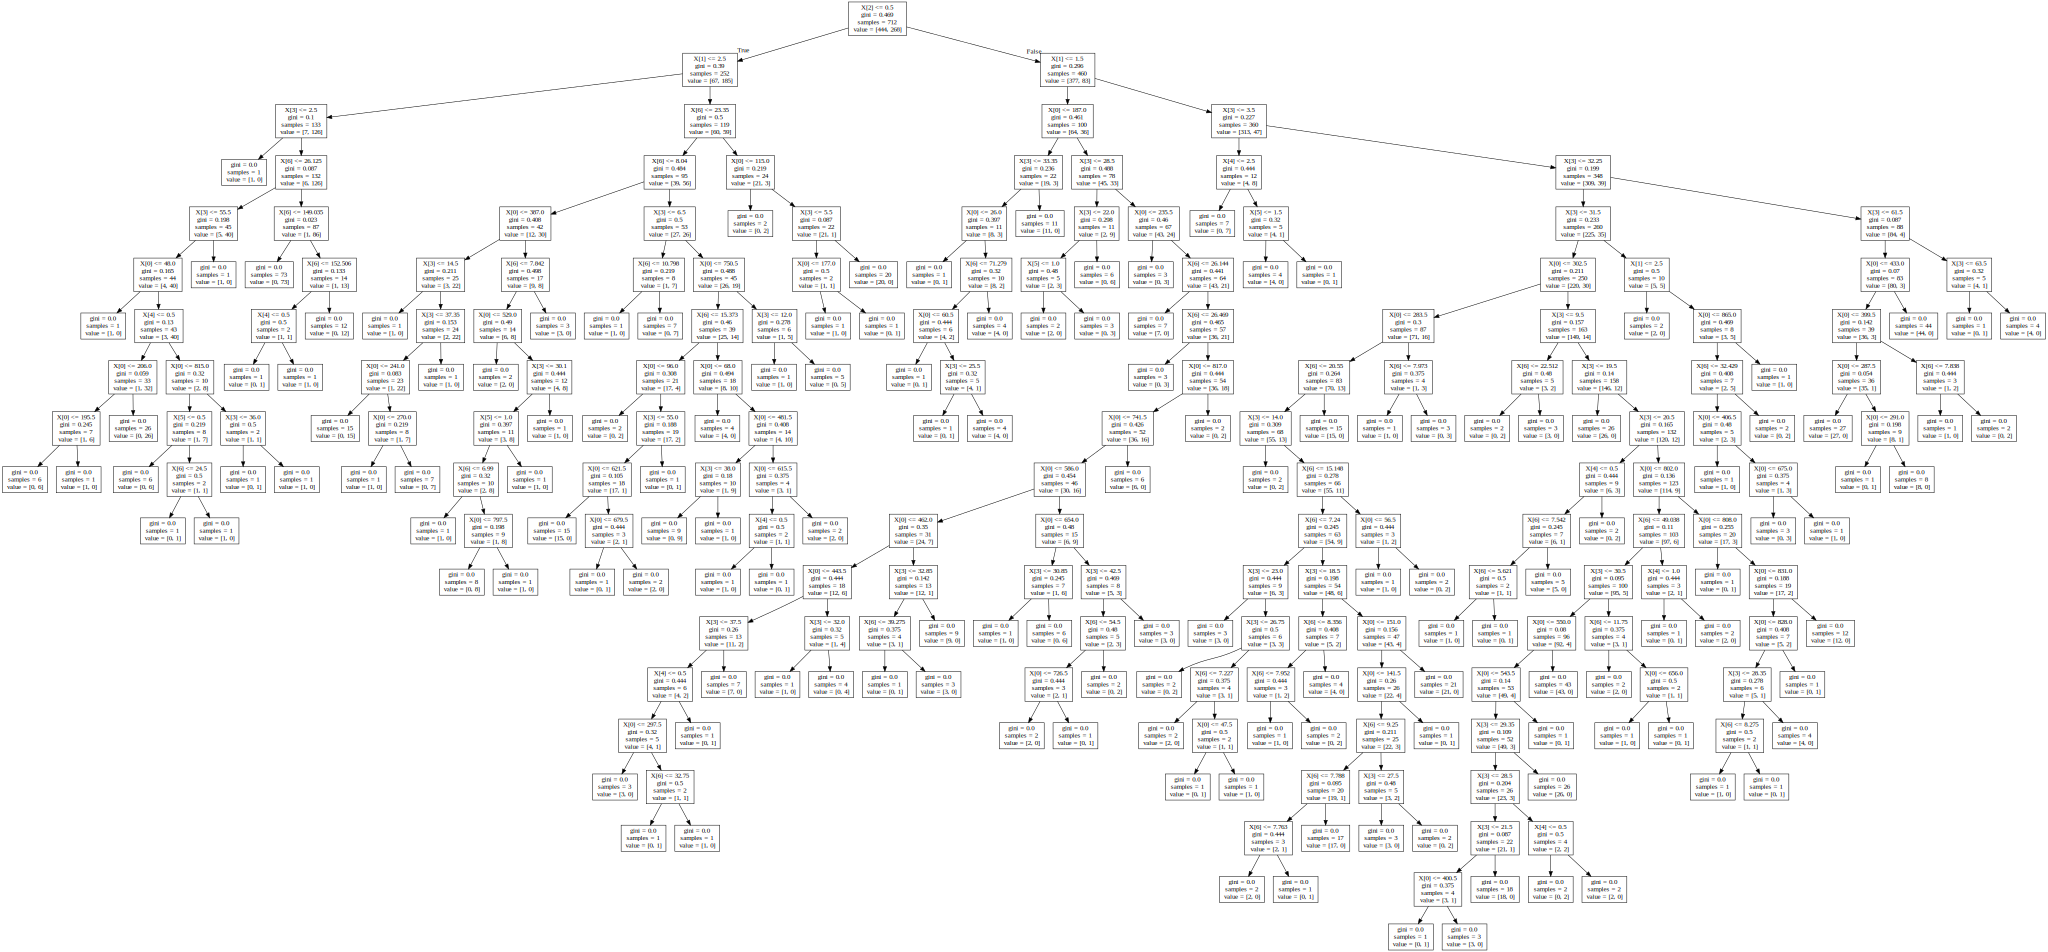

In [50]:
dot_data=tree.export_graphviz(arbre,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

In [51]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


## Change the decision tree parameters(change at least two parameters)

In [52]:
x1=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y1= data["Survived"]

#splitting data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=10)

#applying tree algorithm
arbre1 = tree.DecisionTreeClassifier(max_depth=12,criterion="entropy")  
arbre1.fit(x1_train, y1_train)   #fitting our model

DecisionTreeClassifier(criterion='entropy', max_depth=12)

## Calculate the new accuracy and compare it with the previous results. 

In [53]:
y1_pred=arbre1.predict(x1_test)   # evaluating our model
print("score1:{}".format(accuracy_score(y1_test, y1_pred)))

score1:0.8044692737430168


## score1>score

## Use random forest then change the number of estimators

In [58]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy1:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy1: 0.8491620111731844


In [59]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy2:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy2: 0.8324022346368715


In [60]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=1000)  #Creating a random forest with 1000 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy3:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy3: 0.8603351955307262


### Accuracy2<Accuracy1 < Accuracy3